# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 2 - ODE in 3D

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Projectile in 2D without air resistance

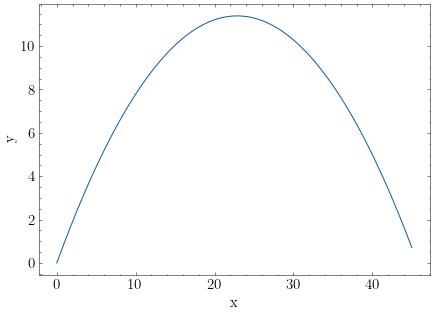

In [51]:
dt = 0.01
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

r = np.zeros((2, N))
v = np.zeros((2, N))

rx0 = 0.0
ry0 = 0.0
vx0 = 15.0
vy0 = 15.0

r[0,0] = rx0
r[1,0] = ry0
v[0,0] = vx0
v[1,0] = vy0

def f_freefall(ri, vi, ti):
    rxi, ryi = ri
    vxi, vyi = vi
    g = 9.81
    m = 1.0
    
    fx = rxi*0 + vxi*0 + ti*0
    fy = -g/m + ryi*0 + vyi*0 + ti*0
    
    return [fx, fy]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving x
        v[0, i+1] = v[0, i] + f_freefall(r[:,i], v[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f_freefall(r[:,i], v[:,i], t[i])[1]*dt
        # Solving y
        r[0, i+1] = r[0, i] + v[0, i + 1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt

    return r, v

r, v = solver_ode(f_freefall, r, v, t, dt)

plt.plot(r[0,:], r[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Projectile in 3D without air resistance

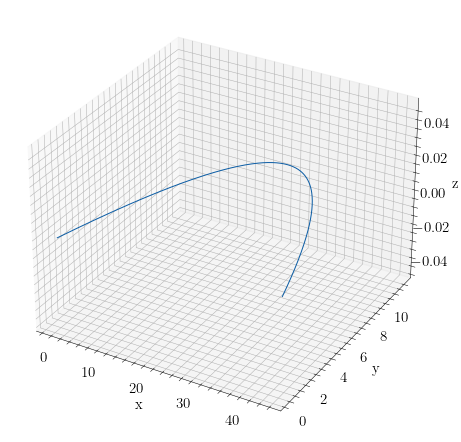

In [64]:
dt = 0.01
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

vx0 = 15.0
vy0 = 15.0
vz0 = 0.0

r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0
v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0

def f_freefall(ri, vi, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    g = 9.81
    m = 1.0
    
    fx = rxi*0 + vxi*0 + ti*0
    fy = -g/m + ryi*0 + vyi*0 + ti*0
    fz = rzi*0 + vzi*0 + ti*0
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f_freefall(r[:,i], v[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f_freefall(r[:,i], v[:,i], t[i])[1]*dt
        v[2, i+1] = v[2, i] + f_freefall(r[:,i], v[:,i], t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_freefall, r, v, t, dt)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Projectile in 3D with quadratic air resistance (Magnus effect)

In [77]:
dt = 0.01
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

r = np.zeros((3, N))
v = np.zeros((3, N))
omega = np.zeros((3, N))

rx0 = 0.0
ry0 = 0.0
rz0 = 0.0

vx0 = 15.0
vy0 = 15.0
vz0 = 0.0

omega_x_0 = 1.0
omega_y_0 = 0.0
omega_z_0 = 0.0


r[0,0] = rx0
r[1,0] = ry0
r[2,0] = rz0
v[0,0] = vx0
v[1,0] = vy0
v[2,0] = vz0
omega[0,0] = omega_x_0
omega[1,0] = omega_y_0
omega[2,0] = omega_z_0



def f_magnus(ri, vi, omega_i, ti):
    rxi, ryi, rzi = ri
    vxi, vyi, vzi = vi
    omega_xi, omega_yi, omega_zi = omega_i
    v_norm_i = np.linalg.norm(vi)
    g = 9.81
    m = 1.0
    c_d = 0.1
    c_m = 1.0
    
    fx = -c_d*vxi*np.abs(v_norm_i) + (c_m/m)*(omega_yi*vzi - omega_zi*vyi)
    fy = -g/m - c_d*vyi*np.abs(v_norm_i) + c_m*(omega_zi*vxi - omega_xi*vzi)
    fz = - c_d*vzi*np.abs(v_norm_i) + (c_m/m)*(omega_xi*vyi - omega_yi*vxi)
    
    return [fx, fy, fz]


def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        # Solving velocities
        v[0, i+1] = v[0, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[0]*dt
        v[1, i+1] = v[1, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[1]*dt
        v[2, i+1] = v[2, i] + f(r[:,i], v[:,i], omega[:,i], t[i])[2]*dt
        
        # Solving positions
        r[0, i+1] = r[0, i] + v[0, i+1]*dt
        r[1, i+1] = r[1, i] + v[1, i+1]*dt
        r[2, i+1] = r[2, i] + v[2, i+1]*dt
    return r, v

r, v = solver_ode(f_magnus, r, v, t, dt)


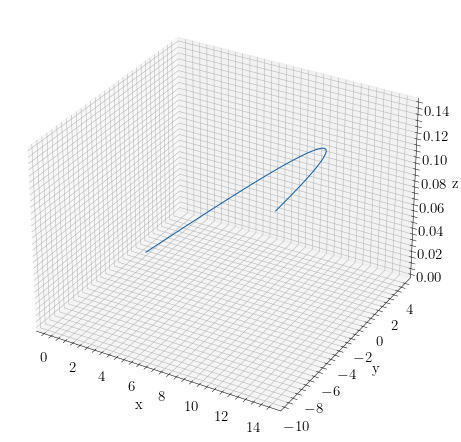

In [78]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(r[0,:], r[1,:], r[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

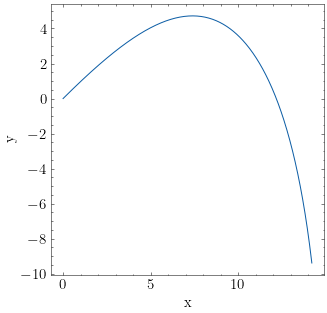

In [79]:
plt.plot(r[0, :], r[1, :])
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.show()